# Теоретический блок.

**1. Выход нового версии приложения запланирован через 2 недели. Какие метрики вы бы использовали для оценки релиза. Сколько нужно времени для принятия решения об успешном или провальном релизе?**



*  Количество скачиваний: показывает, насколько успешно приложение было принято пользователем. Можно отслеживать оперативно в моменте. Но это слабый показатель, для того, чтобы делать какие-то существенные выводы
*  Retention N-day: показывает, насколько приложение удается удерживать пользователей на определенный день. Считается обычно на 1, 7 и 30 день. Я полагаю какие-то осмысленные выводы можно делать не ранее 7 дня.
* Время, проведенное в приложении: показывает, насколько приложение заинтересовало пользователей и насколько они проводят в нем время.
* Конверсия: показывает, сколько пользователей выполняют целевые действия в приложении (например, совершают покупки, регистрируются и т.д.).

Для принятия решения о успешности или провальности релиза необходимо время, чтобы получить достаточное количество данных. Срок зависит от конкретной метрики и ее нормы, но, как правило, для получения точных результатов рекомендуется собирать данные в течение нескольких недель или месяцев. Например, для оценки количества скачиваний может потребоваться несколько дней, а для оценки времени, проведенного в приложении, может понадобиться несколько недель. В любом случае, для принятия решения о успешности или провальности релиза необходимо иметь достаточно данных, чтобы убедиться в их статистической значимости. Я бы начинала от 1 недели.



**2. В ходе анализа данных, вы замечаете в продукте снижение ARPU для страны AU, по одной месячной когорте. Какие ваши дальнейшие действия?**

Мои дальнейшие действия могут быть следующими:

* Посмотрю на динамику данного показателя для других когорт и других стран, чтобы определить локальное изменение или глобальное.

* Искать факторы, которые могут быть связаны с снижением ARPU, такие как последние изменения в продукте, рекламных кампаниях, изменения ценовой политики и т.д. Для этого я буду анализировать метрики, связанные с ARPU, такие как конверсия, retention, LTV, средний чек и т.д.

* Если я не могу найти причины снижения ARPU в данных, то я могу провести дополнительные исследования. Например, я могу провести опросы пользователей, чтобы выявить их мнения и предпочтения, и/или провести анализ конкурентов, чтобы выявить, какие функции или возможности отсутствуют в моем продукте.

* После выявления причин снижения ARPU, я буду разрабатывать план улучшений, чтобы решить эти проблемы. Например, я могу предложить новые функции, улучшить качество продукта, изменить ценовую политику или запустить новые рекламные кампании. После этого я буду реализовывать этот план и мониторить метрики, чтобы убедиться, что мои улучшения действительно повышают ARPU.

* После реализации плана улучшений, я буду продолжать мониторить метрики, связанные с ARPU, чтобы убедиться, что мои изменения действительно повышают эту метрику. Если я замечу, что ARPU продолжает снижаться, то я буду проводить дополнительные исследования и рассматривать другие варианты улучшений.

**3. Ваше приложение интегрировано с MMP. Вам необходимо сформировать дашборд в MMP для ежедневного мониторинга приложения. Какие метрики вы вынесите на этот дашборд?**

1. Количество уникальных пользователей
2. Количество активных пользователей. Можно также добавить долю от п.1
3. Retention-1, -7, -30 дня
4. Количество установок приложения
5. Конверсия в покупку
6. Среднее время пользователя в приложении (также не лишним будет в разбивке на платящих и не платяших)
7. ARPU
8. LTV 

# Практический блок (SQL).

Данное задание я реализовала с помощью pandas, что не соответствует постановке задания. На SQL я представляю как написать запрос, но к сожалению не могу проверить, что он выдает.

Для начала перед выполнением задания прочитаем данные и посмотрим, что в них содержится

In [2]:
import zipfile

file_name = "data.zip"

with zipfile.ZipFile(file_name, 'r') as zip_ref:
    zip_ref.extractall()

In [3]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
ads_data = pd.read_csv('ads_data.csv', parse_dates=['date'], index_col='date')
user_data = pd.read_csv('user_data.csv', parse_dates = ['install_time', 'event_time'])

In [4]:
ads_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 704814 entries, 2021-01-01 to 2021-01-31
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   campaign_id    704814 non-null  int64  
 1   ad_set_id      704814 non-null  int64  
 2   ad_id          704814 non-null  int64  
 3   cpm            704814 non-null  float64
 4   ctr            704814 non-null  float64
 5   spend          704814 non-null  float64
 6   clicks         704814 non-null  int64  
 7   impressions    704814 non-null  int64  
 8   breakdown_set  694614 non-null  object 
 9   breakdowns     704814 non-null  object 
 10  platform       704814 non-null  object 
dtypes: float64(3), int64(5), object(3)
memory usage: 64.5+ MB


In [3]:
ads_data.head()

,campaign_id,ad_set_id,ad_id,cpm,ctr,spend,clicks,impressions,breakdown_set,breakdowns,platform
date,,,,,,,,,,,
2021-01-01,23847157133130369,23847157133120369,23847157133270369,11.59,0.00,3.93,0,339,{country},"{""country"": ""UK""}",ios
2021-01-01,23847157133170369,23847157133180369,23847157133260369,8.31,0.52,4.81,3,579,{country},"{""country"": ""UK""}",android
2021-01-01,23847157133130369,23847157133120369,23847157133250369,23.85,0.63,7.56,2,317,{country},"{""country"": ""UK""}",ios
2021-01-01,23847157133130369,23847157133120369,23847157133240369,17.60,0.37,4.70,1,267,{country},"{""country"": ""UK""}",ios
2021-01-01,23847157133130369,23847157133120369,23847157133230369,23.51,0.00,5.69,0,242,{country},"{""country"": ""UK""}",ios


In [4]:
#распарсим данные по колонке breakdowns, вынесем данные по стране в колонку country

import ast

def extract_country(row):
    dictionary = ast.literal_eval(row)
    try:
      return dictionary['country']
    except:
      return ''

ads_data['country'] = ads_data['breakdowns'].apply(extract_country)
ads_data.head()

,campaign_id,ad_set_id,ad_id,cpm,ctr,spend,clicks,impressions,breakdown_set,breakdowns,platform,country
date,,,,,,,,,,,,
2021-01-01,23847157133130369,23847157133120369,23847157133270369,11.59,0.00,3.93,0,339,{country},"{""country"": ""UK""}",ios,UK
2021-01-01,23847157133170369,23847157133180369,23847157133260369,8.31,0.52,4.81,3,579,{country},"{""country"": ""UK""}",android,UK
2021-01-01,23847157133130369,23847157133120369,23847157133250369,23.85,0.63,7.56,2,317,{country},"{""country"": ""UK""}",ios,UK
2021-01-01,23847157133130369,23847157133120369,23847157133240369,17.60,0.37,4.70,1,267,{country},"{""country"": ""UK""}",ios,UK
2021-01-01,23847157133130369,23847157133120369,23847157133230369,23.51,0.00,5.69,0,242,{country},"{""country"": ""UK""}",ios,UK


In [8]:
user_data.head()

,attributed_touch_time,install_time,event_time,event_name,event_revenue_usd,media_source,channel,campaign_id,adset_id,ad_id,country_code,user_id
0,NaN,2021-01-01 00:08:10.721000+00:00,2021-01-01 00:08:10.721000+00:00,install,NaN,NaN,NaN,NaN,NaN,NaN,VN,1609459686080-7483030925743023347
1,NaN,2021-01-01 00:39:23.948000+00:00,2021-01-01 00:39:23.948000+00:00,install,NaN,NaN,NaN,NaN,NaN,NaN,US,1609461562630-105981105396801528
2,NaN,2021-01-01 00:40:36.525000+00:00,2021-01-01 00:40:36.525000+00:00,reinstall,NaN,NaN,NaN,NaN,NaN,NaN,CZ,1609461625904-7673362380866907786
3,NaN,2021-01-01 00:49:03.486000+00:00,2021-01-01 00:49:03.486000+00:00,reinstall,NaN,NaN,NaN,NaN,NaN,NaN,PT,1609462209340-904240965619919015
4,NaN,2021-01-01 00:51:53.395000+00:00,2021-01-01 00:51:53.395000+00:00,install,NaN,NaN,NaN,NaN,NaN,NaN,US,1609279214347-3174174


In [9]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1645562 entries, 0 to 1645561
Data columns (total 12 columns):
 #   Column                 Non-Null Count    Dtype              
---  ------                 --------------    -----              
 0   attributed_touch_time  813761 non-null   object             
 1   install_time           1645562 non-null  datetime64[ns, UTC]
 2   event_time             1645562 non-null  datetime64[ns, UTC]
 3   event_name             1645562 non-null  object             
 4   event_revenue_usd      638688 non-null   float64            
 5   media_source           813761 non-null   object             
 6   channel                813761 non-null   object             
 7   campaign_id            813761 non-null   float64            
 8   adset_id               813761 non-null   float64            
 9   ad_id                  813761 non-null   float64            
 10  country_code           1542969 non-null  object             
 11  user_id                1

***Создайте скрипт-агрегацию в разрезе недельных когорт, платформы, медиаисточника, для недель*** 

1-7

8-14

15-21

22-end 

по расчету следующих метрик: установки, доход

In [14]:
# первым шагом из таблицы ads_data достанем данные по платформе размещения рекламы в связке с ID.
ad_id_per_platform = ads_data[['ad_id', 'platform']].drop_duplicates()

# а также данные по итого потраченным деньгам в разрезе user_id
revenue_by_user = user_data[['user_id', 'event_revenue_usd']].groupby(['user_id']).sum()

# далее связываем данные из таблицы user_data с таблицей, полученной в первом шаге, чтобы добавить данные о платформе размещения
table = pd.merge(user_data[['media_source', 'ad_id', 'user_id', 'event_time', 'event_name']], 
                 ad_id_per_platform, how='left', on = 'ad_id')

# связываем полученную таблицу с данными по оплатам сводно по каждому user_id
result = pd.merge(table[table['event_name']=='install'].reset_index(), 
         revenue_by_user, how='left', left_on = 'user_id', right_on='user_id', copy=False)


# для группировки данных по периоду устанавливаем дату/время события как индекс
result.set_index('event_time', inplace=True)
result.drop('index', axis=1, inplace=True)

# группируем по платформе и медиаресурсу, агрегиурем по неделям, переименовываем колонки, для более внятного отображения
result.groupby(['platform', 'media_source']).resample('7D').agg({'event_revenue_usd':'sum', 
                                                                 'user_id' : 'count'}).rename(columns={'event_revenue_usd':'total_revenue',
                                                                                                       'user_id' : 'instals'})

total_revenue  instals
platform media_source event_time                                       
android  Facebook Ads 2021-01-01 00:00:00+00:00       49691.94    61123
                      2021-01-08 00:00:00+00:00       55255.76    66605
                      2021-01-15 00:00:00+00:00       34041.60    32299
                      2021-01-22 00:00:00+00:00       22247.35    17329
                      2021-01-29 00:00:00+00:00       14175.79     6981
ios      Facebook Ads 2021-01-01 00:00:00+00:00       35474.91    17211
                      2021-01-08 00:00:00+00:00       23771.45    11729
                      2021-01-15 00:00:00+00:00       23225.34     5742
                      2021-01-22 00:00:00+00:00       21864.67     4145
                      2021-01-29 00:00:00+00:00        9874.65     1888

# Практический блок (Аналитика). 

1.	Проведите анализ окупаемости трафика для стран (RU, IN, MX, AU)

In [20]:
user_data = user_data.set_index('event_time')

In [21]:
list_countries = ['RU', 'IN', 'MX', 'AU']

In [40]:
ads_data.head()

,campaign_id,ad_set_id,ad_id,cpm,ctr,spend,clicks,impressions,breakdown_set,breakdowns,platform,country
date,,,,,,,,,,,,
2021-01-01,23847157133130369,23847157133120369,23847157133270369,11.59,0.00,3.93,0,339,{country},"{""country"": ""UK""}",ios,UK
2021-01-01,23847157133170369,23847157133180369,23847157133260369,8.31,0.52,4.81,3,579,{country},"{""country"": ""UK""}",android,UK
2021-01-01,23847157133130369,23847157133120369,23847157133250369,23.85,0.63,7.56,2,317,{country},"{""country"": ""UK""}",ios,UK
2021-01-01,23847157133130369,23847157133120369,23847157133240369,17.60,0.37,4.70,1,267,{country},"{""country"": ""UK""}",ios,UK
2021-01-01,23847157133130369,23847157133120369,23847157133230369,23.51,0.00,5.69,0,242,{country},"{""country"": ""UK""}",ios,UK


In [25]:
# первым делом подготовим необходимые данные.
# из таблицы user_data выделим только необходимые данные по стране и сумме полученного дохода. Просуммируем данные по дням. 
revenue_by_day = user_data[['country_code', 'event_revenue_usd']].groupby('country_code').resample('D').sum()
revenue_by_day

event_revenue_usd
country_code event_time                                  
AD           2021-01-01 00:00:00+00:00               0.00
             2021-01-02 00:00:00+00:00               0.00
             2021-01-03 00:00:00+00:00               8.14
             2021-01-04 00:00:00+00:00              23.86
             2021-01-05 00:00:00+00:00               0.00
...                                                   ...
ZW           2021-02-27 00:00:00+00:00               0.00
             2021-02-28 00:00:00+00:00               0.00
             2021-03-01 00:00:00+00:00               0.00
             2021-03-02 00:00:00+00:00               0.00
             2021-03-03 00:00:00+00:00               0.00

[12988 rows x 1 columns]

In [48]:
# из таблицы ads_data по добавленной колонке country группировкой с суммированием получаем информацию о сумме 
# потраченных средств на размещение рекламы в данной стране.
spend_per_coutry = ads_data[['country', 'spend']].groupby('country').sum()
spend_per_coutry

,spend
country,
,3096233.19
AD,54.71
AE,9175.54
AF,84.79
AG,169.55
...,...
YT,36.25
ZA,23150.83
ZM,264.77


In [49]:
import matplotlib.pyplot as plt

def plot_per_country(country_code):

  # Calculate the cumulative sum of event revenue
    cumulative_revenue = revenue_by_day.loc[country_code].cumsum()

  # Create a new figure and axis
    fig, ax = plt.subplots()


  # Plot the cumulative sum of event revenue
    ax.plot(cumulative_revenue)

  # Add a horizontal line for the given value
    ax.axhline(y=spend_per_coutry.loc[country_code].spend, color='r', linestyle='--')

  # Set the plot title and axes labels
    ax.set_title(f'Cumulative Event Revenue (Country Code: {country_code})')
    ax.set_xlabel('Event Time')
    ax.set_ylabel('Cumulative Event Revenue (USD)')

  # Show the plot
#     print(f'')
    plt.show()


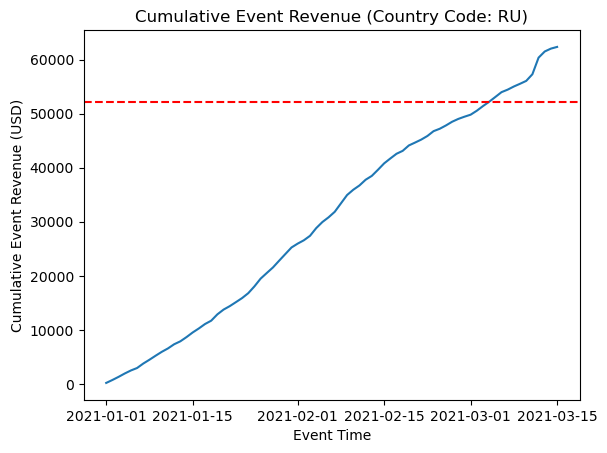

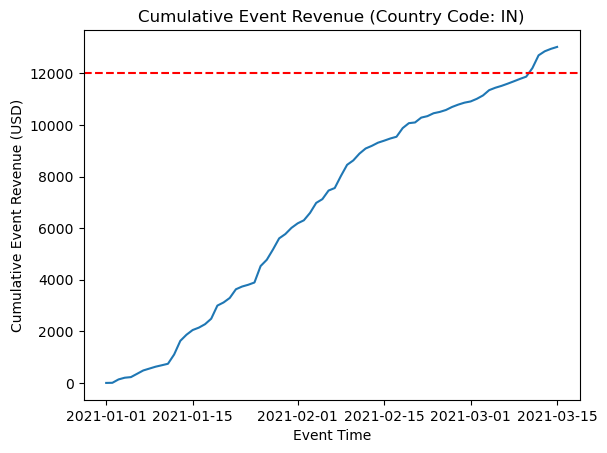

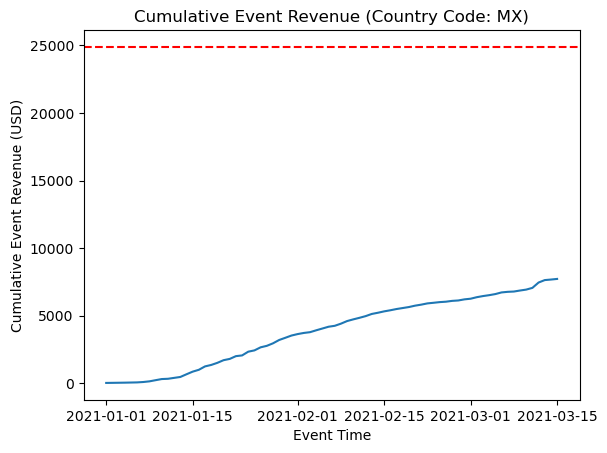

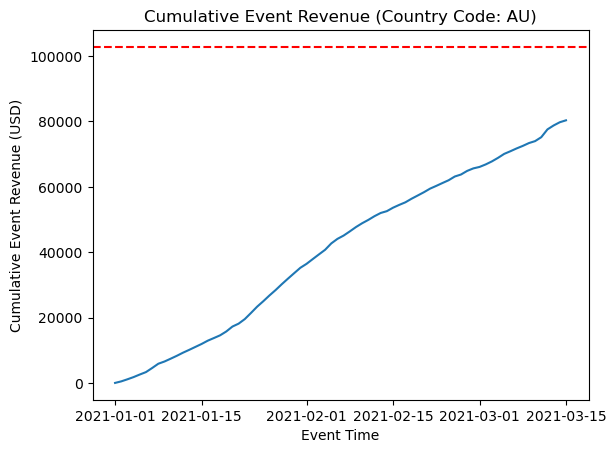

In [50]:
# визуально все чуть быстрее понятно, поэтому нарисуем графики для каждой страны в списке, 
# с накопительной суммой дохода по дням (синяя линия) и суммой потраченных средств на рекламу (красная линия)

for country in list_countries:
  plot_per_country(country)

Как видим, только по 2м странам из выборки (RU, IN) сумма дохода превысила сумму потраченных средств. Посмотрим детальнее.

In [272]:
def country_analysis(country_code):
    cumulative_revenue = revenue_by_day.loc[country_code].cumsum()
    spend = spend_per_coutry.loc[country_code].spend
    revenue = cumulative_revenue[cumulative_revenue['event_revenue_usd']>=spend].iloc[0].event_revenue_usd
    date = cumulative_revenue[cumulative_revenue['event_revenue_usd']>=spend].iloc[0].name.strftime('%d.%m.%Y')
    print('Итого расходы на кампанию по стране {} составляют {:.2f}$'.format(country_code, spend))
    print('Итого доход от привлеченных юзеров по стране {} {:.2f}$'.format(country_code, revenue))
    print('При потраченной сумме средств в размере {:.2f}$ окупаемость наступает {}'.format(revenue, date))

1. RU

In [273]:
country_analysis('RU')

Итого расходы на кампанию по стране RU составляют 52203.41$
Итого доход от привлеченных юзеров по стране RU 52209.02$
При потраченной сумме средств в размере 52209.02$ окупаемость наступает 04.03.2021


2. IN

In [274]:
country_analysis('IN')

Итого расходы на кампанию по стране IN составляют 12024.00$
Итого доход от привлеченных юзеров по стране IN 12204.19$
При потраченной сумме средств в размере 12204.19$ окупаемость наступает 11.03.2021


3. MX

за анализируемый период, расходы на рекламу по данной стране не окупились. Необходимо построить прогноз, чтобы оценить к какой дате накопительный доход будет превышать расходы на рекламу, при аналогичной динамике.

In [140]:
import statsmodels.api as sm

In [269]:
def predict_analysis(country_code, predict_days=100):
    cumulative_revenue = revenue_by_day.loc[country_code]
    total_spend = spend_per_coutry.loc[country_code].spend

    model = sm.tsa.ARIMA(cumulative_revenue, order=(1, 0, 0))
    results = model.fit()
    forecast = results.predict(start=cumulative_revenue.index[-1], 
                               end=cumulative_revenue.index[-1] + pd.DateOffset(days=predict_days))
    predict_sum = pd.concat([cumulative_revenue,
                         pd.DataFrame(forecast).rename(columns={'predicted_mean':'event_revenue_usd'})]).cumsum()
    date = predict_sum.index[predict_sum['event_revenue_usd'] > total_spend]
    if len(date)!=0:
        print('Прогнозная дата окупаемости {}. Прогнозный уровень накопленного дохода на эту дату {:.2f}$ при полных затратах по стране {:.2f}$'.format(date[0].strftime('%d.%m.%Y'), 
                                                                                                                  predict_sum.loc[date[0]].event_revenue_usd,
                                                                                                                  total_spend))
    else:
        print('Прогнозная дата окупаемости в периоде предсказания отсутствует. Размер накопленного дохода на конец прогноза {:.2f}$, при полных затратах по стране {:.2f}$'.format(predict_sum.event_revenue_usd[-1], total_spend))

In [270]:
predict_analysis('MX', 200)

Прогнозная дата окупаемости 29.08.2021. Прогнозный уровень накопленного дохода на эту дату 24955.66$ при полных затратах по стране 24891.97$


Как мы видим по данным выше, окупаемость вложений в рекламу для страны MX по текущим данным составляет больше полугода, что слишком большой срок. Я бы не рекомендовала развивать данный канал размещения, т.к. он крайне неэффективный.

4. AU

In [271]:
predict_analysis('AU', 100)

Прогнозная дата окупаемости 06.04.2021. Прогнозный уровень накопленного дохода на эту дату 103543.90$ при полных затратах по стране 102771.11$


По стране AU окупаемость наступает примерно через месяц, после конца накопленной статистики, что несколько лучше предыдущего примера, но также не очень хороший результат. 